# Projeto de Aplicação

•	**Problema de Negócio:** A TechFlex está perdendo clientes (isso é chamado de churn ou evasão) e não sabe exatamente por quê, <br>
nem quem são os próximos a sair.<br>
•	**Objetivo** de Negócio: Reduzir a taxa de churn em 10% nos próximos 6 meses através de ações de retenção mais eficazes. <br>
•	**Nossa Tarefa (A Pergunta de Dados):** "Podemos construir um modelo de Machine Learning que, com base no histórico e<br>
comportamento de um cliente, consiga prever com alta probabilidade se ele irá ou não evadir no próximo trimestre?"<br>
•	**Resultado Esperado:** Uma forma de identificar os clientes com alto risco de churn para que a equipe de marketing possa <br>
agir antes que eles saiam, oferecendo um desconto, um benefício ou um contato personalizado.<br>


### Coleta e Análise Exploratória (EDA)
A TechFlex nos forneceu um arquivo clientes_techflex.csv (inspirado em datasets do Kaggle) com dados sobre nossos <br>
clientes do último ano.<br>
Primeiro, vamos carregar e dar uma olhada inicial nos nossos dados.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Criando um DataFrame com dados aleatórios de exemplo 
# No mundo real,carregaríamos um DataFrame usando: df = pd.read_csv('clientes_techflex.csv')
dados = {
    'id_cliente': range(1, 101),
    'idade': np.random.randint(18, 65, 100),
    'meses_como_cliente': np.random.randint(1, 48, 100),
    'total_compras': np.random.uniform(100, 5000, 100),
    'sessoes_por_mes': np.random.uniform(1, 20, 100),
    'satisfacao_cliente': np.random.randint(1, 6, 100),
    'churn': np.random.choice([0, 1], 100, p=[0.8, 0.2]) # 0 = Não, 1 = Sim
}
df = pd.DataFrame(dados)

# Corrigindo alguns dados para criar padrões mais claros
df.loc[df['churn'] == 1, 'satisfacao_cliente'] = np.random.randint(1, 4, df['churn'].sum())
df.loc[df['churn'] == 1, 'meses_como_cliente'] = np.random.randint(1, 12, df['churn'].sum())

# Análise inicial
print("--- Primeiras 5 linhas dos dados ---")
print(df.head())
print("\n--- Informações Gerais e Tipos de Dados ---")
df.info()
print("\n--- Resumo Estatístico ---")
print(df.describe())


--- Primeiras 5 linhas dos dados ---
   id_cliente  idade  meses_como_cliente  total_compras  sessoes_por_mes  \
0           1     20                  19    1359.515330         1.200563   
1           2     36                  19    4016.926016        11.469231   
2           3     37                  17     209.673681         8.269008   
3           4     40                  11    3469.517126         3.057725   
4           5     55                   9     868.211312         5.882730   

   satisfacao_cliente  churn  
0                   5      0  
1                   5      0  
2                   3      0  
3                   1      1  
4                   2      1  

--- Informações Gerais e Tipos de Dados ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_cliente          100 non-null    int64  
 1   idade               

In [8]:
df.to_csv('clientes_techflex.csv', index=False)

### Hora do Detetive: Visualizando as Pistas
Vamos fazer algumas perguntas e usar gráficos para respondê-las. <br>
<br>
A evasão é um problema comum?



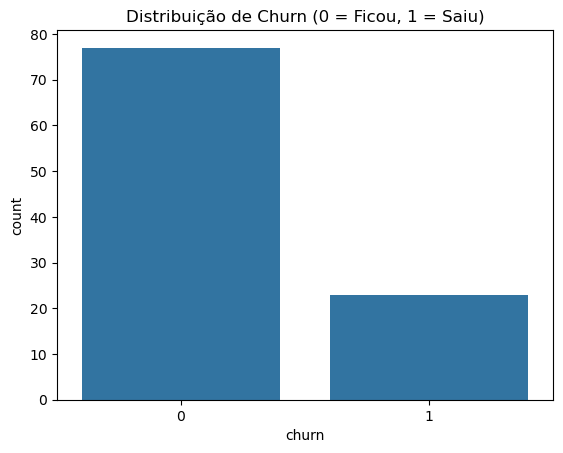

In [2]:
sns.countplot(x='churn', data=df)
plt.title('Distribuição de Churn (0 = Ficou, 1 = Saiu)')
plt.show()


**Pista:** Vemos que o churn é um evento minoritário (como na maioria dos casos reais). <br>
Isso é importante para a avaliação do modelo mais tarde.<br>
<br>
**Pergunta 2:** Clientes que saem têm menor satisfação?


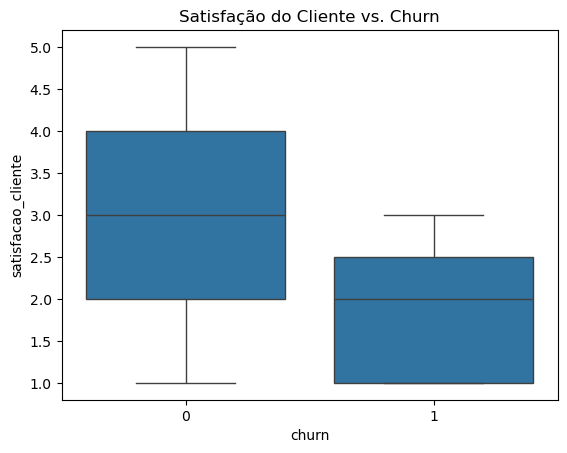

In [3]:
sns.boxplot(x='churn', y='satisfacao_cliente', data=df)
plt.title('Satisfação do Cliente vs. Churn')
plt.show()


**Pista:** Claramente! A "caixa" dos clientes que saíram (churn=1) está concentrada em notas de satisfação<br>
mais baixas. Esta parece ser uma variável preditora muito forte.<br>
<br>
**Pergunta 3:** Clientes mais novos têm maior probabilidade de sair?


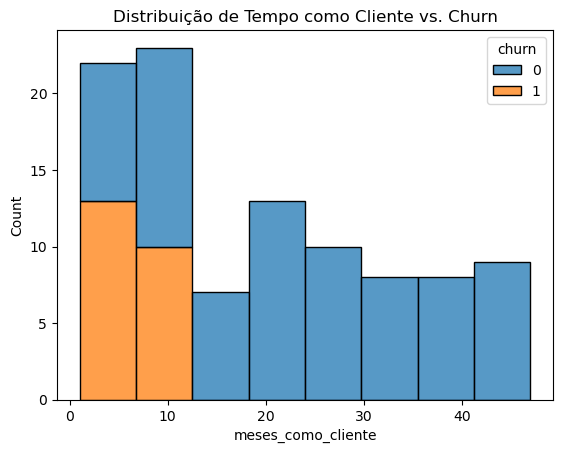

In [4]:
sns.histplot(data=df, x='meses_como_cliente', hue='churn', multiple='stack')
plt.title('Distribuição de Tempo como Cliente vs. Churn')
plt.show()


**Pista:** A barra laranja (churn=1) está muito mais concentrada no lado esquerdo do gráfico, <br>
indicando que clientes com poucos meses de casa são o nosso maior grupo de risco.

## Modelagem

Considerando que os dados estão limpos(sem valores ausentes)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Usaremos um modelo poderoso!
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Seleção de Features e Target
# Vamos usar as variáveis que parecem mais promissoras
features = ['meses_como_cliente', 'total_compras', 'sessoes_por_mes', 'satisfacao_cliente']
target = 'churn'

X = df[features]
y = df[target]

# 2. Divisão em Dados de Treino e Teste (O passo mais importante!)
# Vamos treinar nosso modelo com 80% dos dados e testá-lo nos 20% que ele nunca viu.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# 'stratify=y' garante que a proporção de churn seja a mesma nos sets de treino e teste.

# 3. Treinamento do Modelo
# Escolhemos o RandomForest por ser robusto e eficiente.
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

print("\nModelo treinado com sucesso!")



Modelo treinado com sucesso!


## Avaliação dos Resultados



Acurácia do Modelo: 85.00%

--- Relatório de Classificação ---
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.75      0.60      0.67         5

    accuracy                           0.85        20
   macro avg       0.81      0.77      0.78        20
weighted avg       0.84      0.85      0.84        20



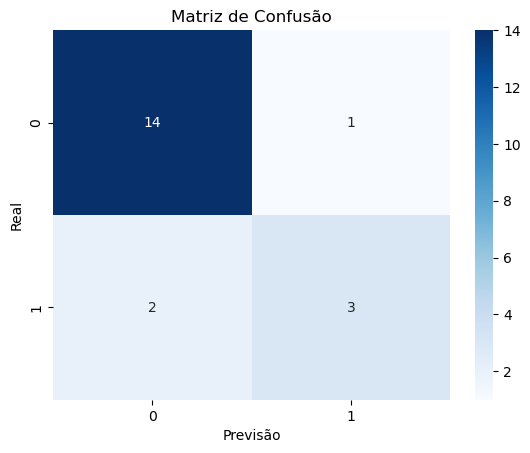

In [6]:
# Fazendo previsões nos dados de teste
previsoes = modelo.predict(X_test)

# Avaliando a performance
acuracia = accuracy_score(y_test, previsoes)
print(f"\nAcurácia do Modelo: {acuracia * 100:.2f}%")

print("\n--- Relatório de Classificação ---")
print(classification_report(y_test, previsoes))

# Matriz de Confusão: uma visão detalhada dos acertos e erros
cm = confusion_matrix(y_test, previsoes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()
